In [1]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt
from helper import *

In [2]:
#CELL ALREADY RUN (data saved as text file in order not to have to re run the whole thing (which takes a while))
#decomment if you want to rerun the while thing

#the data was run for n=[100,500,1000] depending on the result, maybe rerun for n=[100,1000,10000]

#n=[100, 500, 1000]

#array_fn=[]
#array_B_t_1=[]



#for i in range(3):
#
#   t_1=np.random.randint(1,n[i]+1,1)[0] #outputs one random index in range(size(f_n)) excluding t_1=0 and t_1=n+2
#   array_B_t_1= B_t(t_1, n[i], seed=9001)
#   np.savetxt("array_B_t_1"+str(n[i])+".csv", array_B_t_1, delimiter = ",")
    
    #prerunning f_n to ease modifications later on
#    array_fn=f_n(n[i]) 
#    np.savetxt("array_fn"+str(n[i])+".csv", array_fn, delimiter = ",")
    
#np.savetxt("array_fn.csv", array_fn, delimiter = ",")
#np.savetxt("array_B_t_1.csv", array_B_t_1, delimiter = ",")

In [2]:
#loading the pre-run data
n=[100, 500, 1000]

array_fn=[]
array_B_t_1=[]

for i in range(3):
    pre_run_f_n=np.loadtxt("DATA/array_fn"+str(n[i])+".csv", delimiter=",", dtype=float)
    array_fn.append(pre_run_f_n)
    pre_run_B_t_1=np.loadtxt("DATA/array_B_t_1"+str(n[i])+".csv", delimiter=",", dtype=float)
    array_B_t_1.append(pre_run_B_t_1)

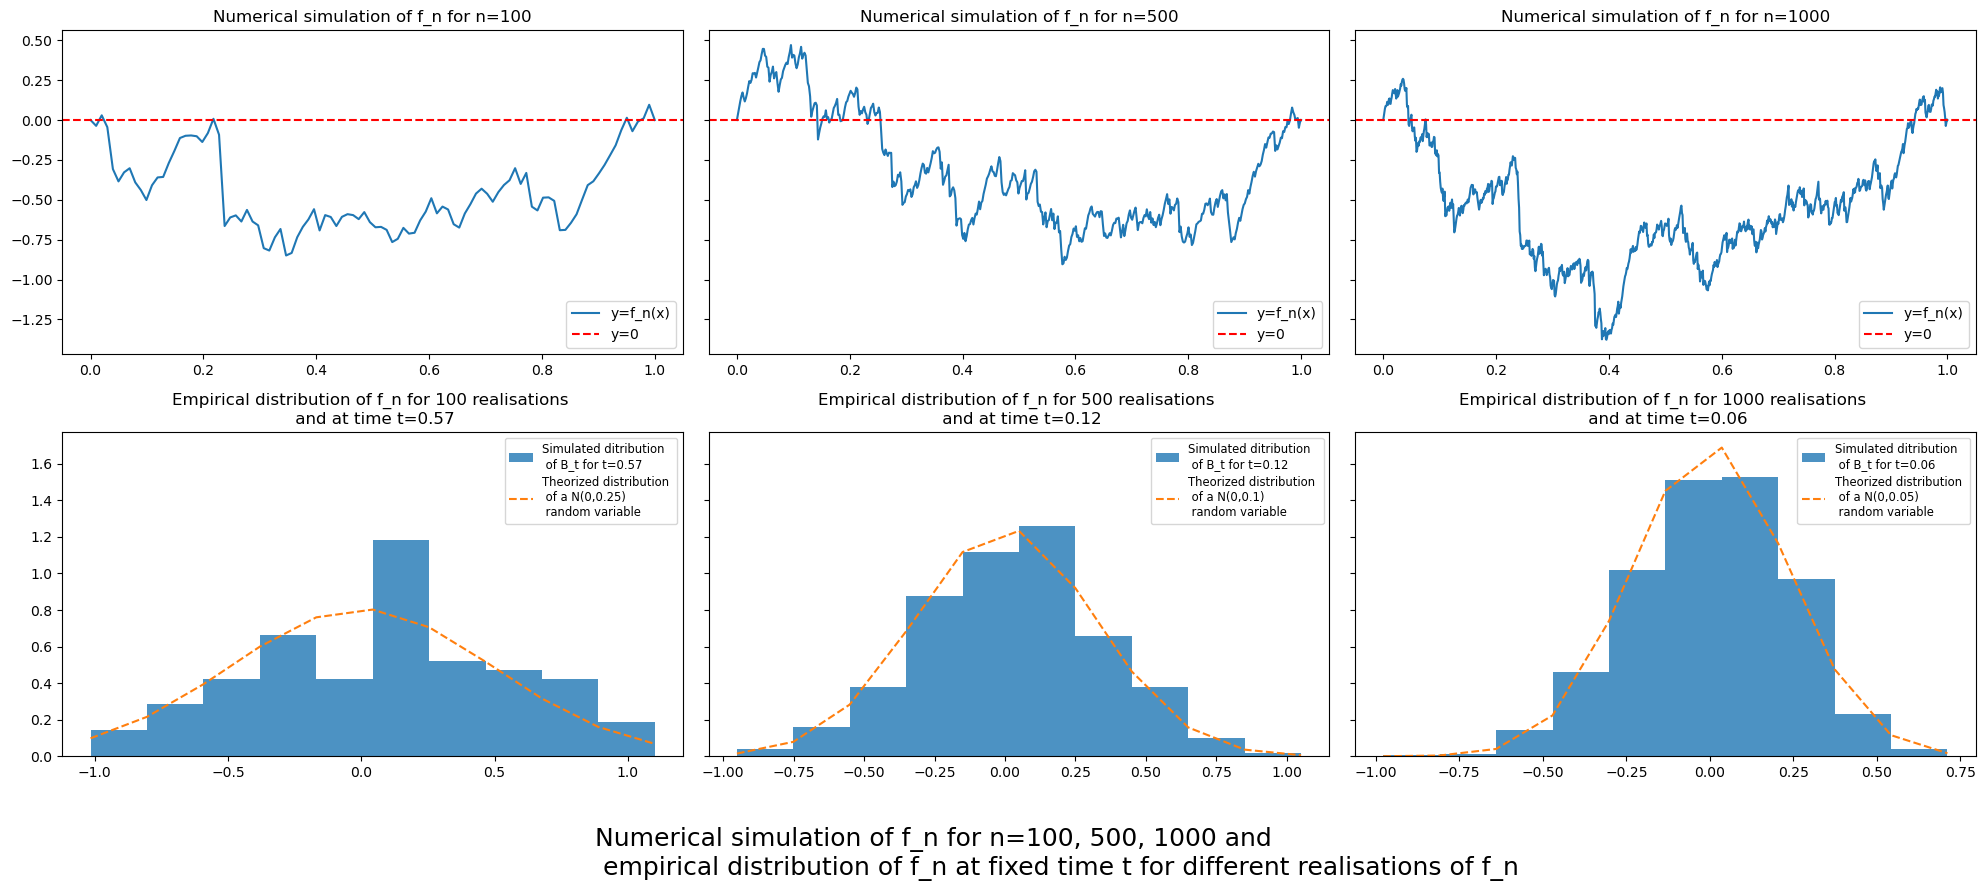

In [28]:
n=[100, 500, 1000] #in further computation, might change this to n=[100,1000,10000]
fig, ax = plt.subplots(2,3,figsize= (20,8), sharey = 'row', sharex = False)

#plot for the brownian bridge for different values of n
for i in range(3):
    sbplt = ax[0,i]
    z=np.linspace(0,1,n[i]+2) #list of increments
    #sbplt.plot(z,f_n(n[i]), label="y=f_n(x)")  #the original command without pre-running
    sbplt.plot(z,array_fn[i], label="y=f_n(x)")#with pre-running
    sbplt.axhline(y=0, color='r', linestyle='--', label="y=0")
    sbplt.set_title("Numerical simulation of f_n for n=%s" % n[i])
    sbplt.legend(loc='lower right')

#plot of different realisations of a brownian bridge for a fixed value t in ]0,1[ for different values of n
for i in range(3):
    sbplt = ax[1,i]
    np.random.seed(9001) #for reproducibility
    t_1=np.random.randint(1,n[i]+1,1)[0] #outputs one random index in range(size(f_n)) excluding t_1=0 and t_1=n+2
    #B_t_1=B_t(t_1, seed=9001)  #the original command without pre-running
    
    #adapting t_1 to make it belong in [0,1]
    norm_t=t_1/(n[i]+2)
    std=np.sqrt(norm_t*(1-norm_t))
    
    #should look like a centered normal gaussian variable with mean 0 and variance t_1(1-t_1)
    _, bins, _=sbplt.hist(array_B_t_1[i], density=True, label="Simulated ditribution \n of B_t for t=%s" %np.round(norm_t,2) , alpha=0.8)

    #theorized distribution of a centered normal gaussian variable with mean 0 and variance t_1(1-t_1)
    y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * bins)**2))
    sbplt.plot(bins, y, '--', label="Theorized distribution \n of a N(0,%s) \n random variable" %np.round(std**2,2))
    sbplt.legend(loc="upper right", fontsize="small")
    sbplt.set_title("Empirical distribution of f_n for {} realisations \n and at time t={}".format(n[i], np.round(norm_t,2)))
    
fig.tight_layout()

fig.text(0.3 ,-0.1,"Numerical simulation of f_n for n=100, 500, 1000 and \n empirical distribution of f_n at fixed time t for different realisations of f_n", fontsize=18)

plt.savefig("Figures/numerical_simulation_plots.png")
plt.show()

*Comment: for n=1000 it doesn't look that nice, I think we would have better results with n=[100,1000,10000]* 

### Plot for the covariance 